## Izmir green space analysis with OSM data Step-1
This project aims to analyze the spatial distribution of green spaces of Izmır by counting number of green areas at neighbourhood and borough levels.
The projects accomplished in three steps:
1. It starts with extracting OSM Izmir green areas data and continous with the data cleaning.
2. At the second step, the existing neighbourhood shapefile is prepared for the spatial join by filtering and cleaning unnecessary entries. Then, the Izmir borough data is generated by aggregating the neighbourhood shapefile. 
3. In this step, Osm İzmir green areas data and shapefile data are spatially joined together and used for the analysis.


In [1]:
import osmnx as ox
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
tags = {
    "leisure": ["park", "garden", "playground","pitch", "recreation_ground"], 
    "landuse": "forest"   
}
green_izmir = ox.features_from_place("Izmir, Turkey", tags)

In [3]:
green_izmir.head()

barrier                   geometry     leisure  \
element_type osmid                                                       
node         3762437414     NaN  POINT (27.37389 37.94258)  playground   
             3999523005     NaN  POINT (27.27746 37.93217)  playground   
             4002504031     NaN  POINT (27.37345 37.96300)  playground   
             4002504032     NaN  POINT (27.37315 37.96162)  playground   
             6790231538     NaN  POINT (27.35375 38.15291)  playground   

                        addr:city addr:district addr:housenumber  \
element_type osmid                                                 
node         3762437414       NaN           NaN              NaN   
             3999523005       NaN           NaN              NaN   
             4002504031       NaN           NaN              NaN   
             4002504032       NaN           NaN              NaN   
             6790231538       NaN           NaN              NaN   

                        addr:neighbourhood addr:street name access  ...  \
element_type osmid                                                  ...   
node         3762437414                NaN         NaN  NaN    NaN  ...   
             3999523005                NaN         NaN  NaN    NaN  ...   
             4002504031                NaN         NaN  NaN    NaN  ...   
             4002504032                NaN         NaN  NaN    NaN  ...   
             6790231538                NaN         NaN  NaN    NaN  ...   

                        parking supervised landcover name_1 cuisine  \
element_type osmid                                                    
node         3762437414     NaN        NaN       NaN    NaN     NaN   
             3999523005     NaN        NaN       NaN    NaN     NaN   
             4002504031     NaN        NaN       NaN    NaN     NaN   
             4002504032     NaN        NaN       NaN    NaN     NaN   
             6790231538     NaN        NaN       NaN    NaN     NaN   

                        gaelic_games:football fitness_station league location  \
element_type osmid                                                              
node         3762437414                   NaN             NaN    NaN      NaN   
             3999523005                   NaN             NaN    NaN      NaN   
             4002504031                   NaN             NaN    NaN      NaN   
             4002504032                   NaN             NaN    NaN      NaN   
             6790231538                   NaN             NaN    NaN      NaN   

                        place  
element_type osmid             
node         3762437414   NaN  
             3999523005   NaN  
             4002504031   NaN  
             4002504032   NaN  
             6790231538   NaN  

[5 rows x 83 columns]

In [4]:
green_izmir.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 4306 entries, ('node', 3762437414) to ('way', 507071972)
Data columns (total 83 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   barrier                8 non-null      object  
 1   geometry               4306 non-null   geometry
 2   leisure                3528 non-null   object  
 3   addr:city              69 non-null     object  
 4   addr:district          62 non-null     object  
 5   addr:housenumber       10 non-null     object  
 6   addr:neighbourhood     81 non-null     object  
 7   addr:street            45 non-null     object  
 8   name                   619 non-null    object  
 9   access                 92 non-null     object  
 10  highway                1 non-null      object  
 11  nodes                  4216 non-null   object  
 12  landuse                790 non-null    object  
 13  source                 479 non-null    object  
 14 

In [5]:
green_izmir.isnull().sum()

barrier                  4298
geometry                    0
leisure                   778
addr:city                4237
addr:district            4244
                         ... 
gaelic_games:football    4305
fitness_station          4305
league                   4305
location                 4305
place                    4304
Length: 83, dtype: int64

### Data Filtering
Izmır OSM green space dataset consists of a total of 4.306 records and 83 columns.
Since the analysis focuses on the number of green areas per neighbourhood and borough, there is no need to keep all the columns.
We will keep only necessary columns and rmove the rest.


In [6]:
green_izmir_filtered = green_izmir[["geometry", "leisure", "landuse", "natural", "name"]]

In [7]:
green_izmir_filtered.head()

geometry     leisure landuse  \
element_type osmid                                                       
node         3762437414  POINT (27.37389 37.94258)  playground     NaN   
             3999523005  POINT (27.27746 37.93217)  playground     NaN   
             4002504031  POINT (27.37345 37.96300)  playground     NaN   
             4002504032  POINT (27.37315 37.96162)  playground     NaN   
             6790231538  POINT (27.35375 38.15291)  playground     NaN   

                        natural name  
element_type osmid                    
node         3762437414     NaN  NaN  
             3999523005     NaN  NaN  
             4002504031     NaN  NaN  
             4002504032     NaN  NaN  
             6790231538     NaN  NaN

### Geometries Type
The entries in the geometry column have different types of geometries; Polygon,MultiPolygon, Point.
Since only the number of green spaces are needed, all geometies will be converted to Point type. 

In [8]:
green_izmir_filtered.geom_type.value_counts()


Polygon         4209
Point             90
MultiPolygon       7
Name: count, dtype: int64

In [9]:
green_points_izmir = green_izmir_filtered.copy()

In [10]:
# green_points_izmir["geometry"] = green_points_izmir["geometry"].centroid

In [11]:
green_points_izmir.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Converting CRS
The geometry records in the dataset have CRS in __degrees__. This can couse errors when calculating centrids. Therefore, the CRS will first be converted to __meters__ and then back to __degrees.__


In [12]:
green_points_izmir_proj =green_points_izmir.to_crs(epsg=3857)


In [13]:
green_points_izmir_proj.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
green_points_izmir_proj["geometry"] = green_points_izmir_proj["geometry"].centroid

In [15]:
green_points_izmir_proj.head()

geometry     leisure landuse  \
element_type osmid                                                             
node         3762437414  POINT (3047247.295 4571317.903)  playground     NaN   
             3999523005  POINT (3036512.968 4569848.248)  playground     NaN   
             4002504031  POINT (3047198.326 4574200.102)  playground     NaN   
             4002504032  POINT (3047164.652 4574005.749)  playground     NaN   
             6790231538  POINT (3045005.866 4601049.954)  playground     NaN   

                        natural name  
element_type osmid                    
node         3762437414     NaN  NaN  
             3999523005     NaN  NaN  
             4002504031     NaN  NaN  
             4002504032     NaN  NaN  
             6790231538     NaN  NaN

In [16]:
green_points_izmir_proj.geom_type.value_counts()


Point    4306
Name: count, dtype: int64

In [17]:
green_points_izmir_deg = green_points_izmir_proj.to_crs(green_points_izmir.crs)

In [18]:
green_points_izmir_deg.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

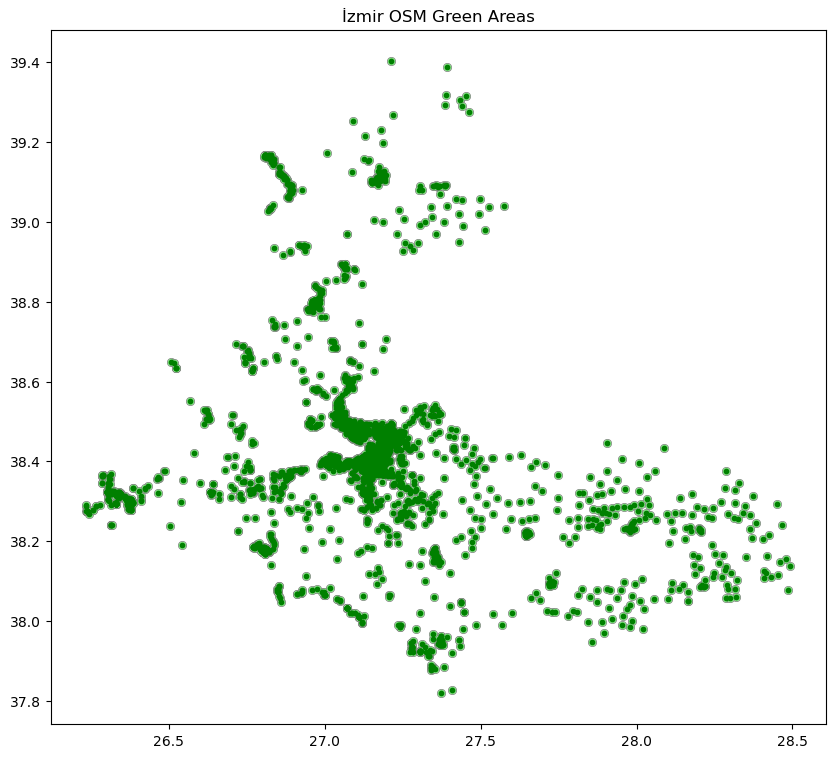

In [19]:
fig, ax = plt.subplots(figsize=(10,10))
green_points_izmir_deg.plot(ax=ax, color = "lightgreen", edgecolor = "gray", linewidth = 0.5)
green_points_izmir_deg.plot(ax = ax, color="green",markersize = 10)
plt.title("İzmir OSM Green Areas")
plt.show()

In [20]:
green_points_izmir_deg.to_file("Izmır_green_data.gpkg", layer='points', driver="GPKG")

In [21]:
gdf = gpd.read_file("Izmır_green_data.gpkg")

In [22]:
gdf.head()

,element_type,osmid,leisure,landuse,natural,name,geometry
0,node,3762437414,playground,None,None,None,POINT (27.37389 37.94258)
1,node,3999523005,playground,None,None,None,POINT (27.27746 37.93217)
2,node,4002504031,playground,None,None,None,POINT (27.37345 37.96300)
3,node,4002504032,playground,None,None,None,POINT (27.37315 37.96162)
4,node,6790231538,playground,None,None,None,POINT (27.35375 38.15291)


In [23]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4306 entries, 0 to 4305
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   element_type  4306 non-null   object  
 1   osmid         4306 non-null   int64   
 2   leisure       3528 non-null   object  
 3   landuse       790 non-null    object  
 4   natural       24 non-null     object  
 5   name          619 non-null    object  
 6   geometry      4306 non-null   geometry
dtypes: geometry(1), int64(1), object(5)
memory usage: 235.6+ KB


### Outcome
The dataset is now ready with consistent point geometries, proper CRS, and only relevant attributes. This ensures accurate spatial analysis in the next step.

### Transition to Step-2
The next step will focus on preparing the neighbourhood shapefile for the spatial join, which includes filtering, cleaning, and generating borough-level boundaries from the neighbourhood data.